<a href="https://colab.research.google.com/github/idilesen/Facial-Emotion-Recognition/blob/main/computer_vision_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Kaggle API'yi yükle
!pip install -q kaggle

# Kaggle API için klasör oluştur
!mkdir -p ~/.kaggle

# Kullanıcıya Kaggle API kimlik bilgilerini yükleme talimatı ver
print("NOT: Kaggle API'yi kullanmak için Kaggle hesabınızdan API anahtarı almanız gerekiyor.")
print("1. Kaggle.com adresine gidin ve oturum açın")
print("2. Sağ üstteki profil simgesine tıklayın > Account")
print("3. 'API' bölümünde 'Create New API Token' düğmesine tıklayın")
print("4. İndirilen 'kaggle.json' dosyasını aşağıda yükleyin")
print("\nŞimdi kaggle.json dosyasını yükleyin:")

from google.colab import files
uploaded = files.upload()

# Kaggle.json dosyasını ~/.kaggle/ dizinine kopyala ve izinleri ayarla
if 'kaggle.json' in uploaded:
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Kaggle kimlik bilgileri başarıyla ayarlandı!")
else:
    print("kaggle.json dosyası yüklenmedi!")

NOT: Kaggle API'yi kullanmak için Kaggle hesabınızdan API anahtarı almanız gerekiyor.
1. Kaggle.com adresine gidin ve oturum açın
2. Sağ üstteki profil simgesine tıklayın > Account
3. 'API' bölümünde 'Create New API Token' düğmesine tıklayın
4. İndirilen 'kaggle.json' dosyasını aşağıda yükleyin

Şimdi kaggle.json dosyasını yükleyin:


Saving kaggle.json to kaggle.json
Kaggle kimlik bilgileri başarıyla ayarlandı!


In [7]:
# FER2013 veri setini indir
!kaggle datasets download -d msambare/fer2013

# İndirilen dosyaları kontrol et
!ls -la

# Zip dosyasını çıkar
!unzip -q fer2013.zip

# Çıkarılan dosyaları kontrol et
!ls -la

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.24GB/s]
total 61796
drwxr-xr-x 1 root root     4096 Sep 26 17:34  .
drwxr-xr-x 1 root root     4096 Sep 26 17:26  ..
drwxr-xr-x 4 root root     4096 Sep 25 13:36  .config
-rw-r--r-- 1 root root 63252113 Jul 19  2020  fer2013.zip
-rw-r--r-- 1 root root       63 Sep 26 17:32 'kaggle (1).json'
-rw-r--r-- 1 root root       63 Sep 26 17:34  kaggle.json
drwxr-xr-x 1 root root     4096 Sep 25 13:37  sample_data
total 61804
drwxr-xr-x 1 root root     4096 Sep 26 17:34  .
drwxr-xr-x 1 root root     4096 Sep 26 17:26  ..
drwxr-xr-x 4 root root     4096 Sep 25 13:36  .config
-rw-r--r-- 1 root root 63252113 Jul 19  2020  fer2013.zip
-rw-r--r-- 1 root root       63 Sep 26 17:32 'kaggle (1).json'
-rw-r--r-- 1 root root       63 Sep 26 17:34  kaggle.json
drwxr-xr-x 1 root root     4096 Sep 25 13:37  sample_data
drwxr-xr-x 9 root root     4096 Sep 26 17:34

In [4]:
# Zip dosyasını çıkar
!unzip -q fer2013.zip

# Çıkarılan dosyaları kontrol et
!ls -la

unzip:  cannot find or open fer2013.zip, fer2013.zip.zip or fer2013.zip.ZIP.
total 20
drwxr-xr-x 1 root root 4096 Sep 26 17:32  .
drwxr-xr-x 1 root root 4096 Sep 26 17:26  ..
drwxr-xr-x 4 root root 4096 Sep 25 13:36  .config
-rw-r--r-- 1 root root   63 Sep 26 17:32 'kaggle (1).json'
drwxr-xr-x 1 root root 4096 Sep 25 13:37  sample_data


In [8]:
import os
# Test ve train klasörlerinin içini incele
print("Train klasörü içeriği:")
!ls -la train

print("\nTest klasörü içeriği:")
!ls -la test

# Her duygu klasöründeki görüntü sayısını kontrol edelim
print("\nTrain klasöründeki görüntü sayıları:")
for emotion in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
    num_images = len([f for f in os.listdir(f"train/{emotion}") if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{emotion}: {num_images} görüntü")

print("\nTest klasöründeki görüntü sayıları:")
for emotion in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
    num_images = len([f for f in os.listdir(f"test/{emotion}") if f.endswith(('.jpg', '.jpeg', '.png'))])
    print(f"{emotion}: {num_images} görüntü")

# Validation klasörü oluşturma
import os
import shutil
import random

validation_dir = '/content/validation'
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir, exist_ok=True)

    # Her duygu için alt klasörler oluştur
    for emotion in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
        os.makedirs(os.path.join(validation_dir, emotion), exist_ok=True)

Train klasörü içeriği:
total 1320
drwxr-xr-x 9 root root   4096 Sep 26 17:34 .
drwxr-xr-x 1 root root   4096 Sep 26 17:34 ..
drwxr-xr-x 2 root root 188416 Sep 26 17:34 angry
drwxr-xr-x 2 root root  20480 Sep 26 17:34 disgust
drwxr-xr-x 2 root root 192512 Sep 26 17:34 fear
drwxr-xr-x 2 root root 331776 Sep 26 17:34 happy
drwxr-xr-x 2 root root 237568 Sep 26 17:34 neutral
drwxr-xr-x 2 root root 225280 Sep 26 17:34 sad
drwxr-xr-x 2 root root 143360 Sep 26 17:34 surprise

Test klasörü içeriği:
total 360
drwxr-xr-x 9 root root  4096 Sep 26 17:34 .
drwxr-xr-x 1 root root  4096 Sep 26 17:34 ..
drwxr-xr-x 2 root root 49152 Sep 26 17:34 angry
drwxr-xr-x 2 root root  4096 Sep 26 17:34 disgust
drwxr-xr-x 2 root root 49152 Sep 26 17:34 fear
drwxr-xr-x 2 root root 81920 Sep 26 17:34 happy
drwxr-xr-x 2 root root 69632 Sep 26 17:34 neutral
drwxr-xr-x 2 root root 69632 Sep 26 17:34 sad
drwxr-xr-x 2 root root 36864 Sep 26 17:34 surprise

Train klasöründeki görüntü sayıları:
angry: 3995 görüntü
disgust:

Train setinden örnek görüntüler:


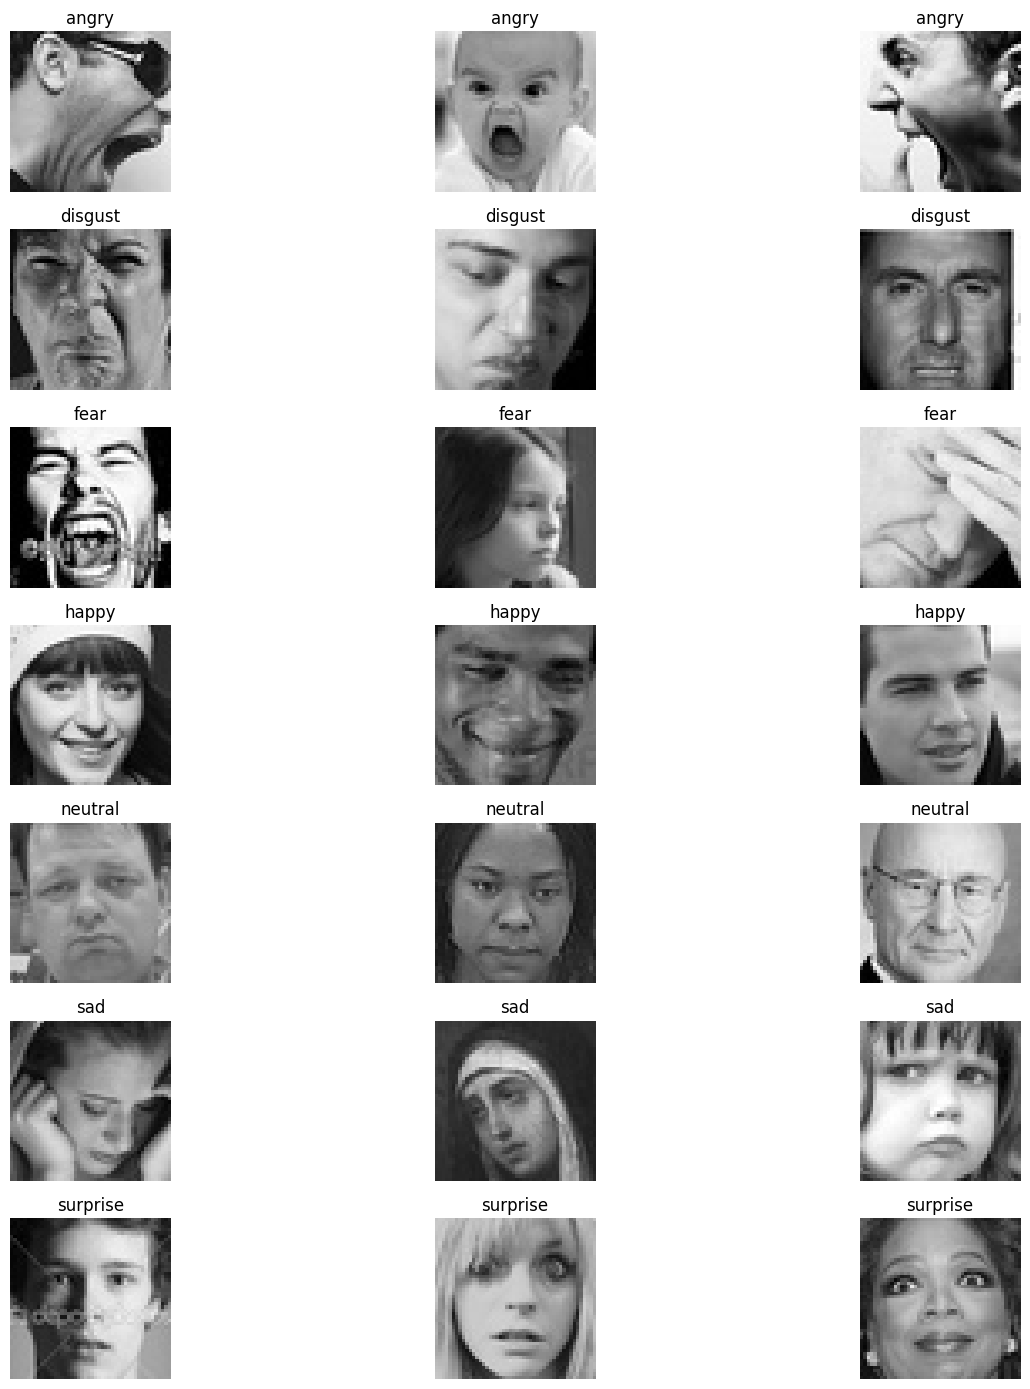

In [9]:
# Her duygudan örnek görüntüleri gösterelim
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

def show_sample_images(data_dir, n_samples=3):
    """Her duygudan örnek görüntüleri gösterir"""
    emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

    plt.figure(figsize=(15, len(emotions) * 2))

    for i, emotion in enumerate(emotions):
        emotion_dir = os.path.join(data_dir, emotion)
        all_images = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Rastgele görüntüleri seç
        sample_images = random.sample(all_images, min(n_samples, len(all_images)))

        for j, img_file in enumerate(sample_images):
            img_path = os.path.join(emotion_dir, img_file)
            img = cv2.imread(img_path)

            # BGR'den RGB'ye dönüştür
            if img is not None:
                if len(img.shape) == 3:  # Renkli görüntü
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                plt.subplot(len(emotions), n_samples, i * n_samples + j + 1)
                plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
                plt.title(f"{emotion}")
                plt.axis('off')
            else:
                print(f"Hata: {img_path} yüklenemedi.")

    plt.tight_layout()
    plt.show()

# Train setinden örnekleri göster
print("Train setinden örnek görüntüler:")
show_sample_images('/content/train')

In [10]:
# Validation klasörünü kontrol et
import os

# Validation klasörü var mı?
if os.path.exists('/content/validation'):
    print("Validation klasörü mevcut.")

    # Alt klasörleri kontrol et
    emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
    all_valid = True

    for emotion in emotions:
        emotion_dir = os.path.join('/content/validation', emotion)

        if os.path.exists(emotion_dir):
            # Dosya sayısını kontrol et
            files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            file_count = len(files)

            print(f"validation/{emotion}: {file_count} görüntü")

            if file_count == 0:
                print(f"UYARI: validation/{emotion} klasörü boş!")
                all_valid = False
        else:
            print(f"HATA: validation/{emotion} klasörü bulunamadı!")
            all_valid = False

    if all_valid:
        print("\nValidation klasörü başarıyla oluşturulmuş ve tüm duygu kategorileri için görüntüler içeriyor.")
    else:
        print("\nValidation klasörü ile ilgili sorunlar var, yukarıdaki uyarıları kontrol edin.")
else:
    print("Validation klasörü bulunamadı! Validation seti oluşturulması gerekiyor.")

    # Validation klasörünü oluştur
    print("\nValidation klasörü oluşturuluyor...")
    os.makedirs('/content/validation', exist_ok=True)

    # Her duygu için alt klasörler oluştur
    for emotion in emotions:
        os.makedirs(os.path.join('/content/validation', emotion), exist_ok=True)

    # Train klasöründen validation setini oluştur
    def create_validation_set(train_dir, validation_dir, validation_split=0.2):
        """Train klasöründen validation seti oluşturur"""
        import random

        for emotion in emotions:
            # Kaynak ve hedef klasörler
            src_dir = os.path.join(train_dir, emotion)
            dst_dir = os.path.join(validation_dir, emotion)

            # Tüm görüntü dosyalarını listele
            all_images = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

            # Validation setine taşınacak görüntü sayısı
            num_validation = int(len(all_images) * validation_split)

            # Rastgele görüntü seç
            random.seed(42)  # Tekrarlanabilirlik için
            validation_images = random.sample(all_images, num_validation)

            # Seçilen görüntüleri validation klasörüne kopyala
            for img in validation_images:
                src_path = os.path.join(src_dir, img)
                dst_path = os.path.join(dst_dir, img)
                shutil.copy(src_path, dst_path)

            print(f"{emotion}: {num_validation} görüntü validation setine kopyalandı.")

    # Validation setini oluştur
    import shutil
    create_validation_set('/content/train', '/content/validation')

    # Validation setini yeniden kontrol et
    print("\nValidation klasörü yeniden kontrol ediliyor:")
    for emotion in emotions:
        emotion_dir = os.path.join('/content/validation', emotion)
        files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        file_count = len(files)
        print(f"validation/{emotion}: {file_count} görüntü")

Validation klasörü mevcut.
validation/angry: 0 görüntü
UYARI: validation/angry klasörü boş!
validation/disgust: 0 görüntü
UYARI: validation/disgust klasörü boş!
validation/fear: 0 görüntü
UYARI: validation/fear klasörü boş!
validation/happy: 0 görüntü
UYARI: validation/happy klasörü boş!
validation/neutral: 0 görüntü
UYARI: validation/neutral klasörü boş!
validation/sad: 0 görüntü
UYARI: validation/sad klasörü boş!
validation/surprise: 0 görüntü
UYARI: validation/surprise klasörü boş!

Validation klasörü ile ilgili sorunlar var, yukarıdaki uyarıları kontrol edin.


In [11]:
# Train klasöründen validation setini oluştur
import os
import shutil
import random

def create_validation_set(train_dir, validation_dir, validation_split=0.2):
    """Train klasöründen validation seti oluşturur"""
    emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

    for emotion in emotions:
        # Kaynak ve hedef klasörler
        src_dir = os.path.join(train_dir, emotion)
        dst_dir = os.path.join(validation_dir, emotion)

        # Tüm görüntü dosyalarını listele
        all_images = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Validation setine taşınacak görüntü sayısı
        num_validation = int(len(all_images) * validation_split)

        # Rastgele görüntü seç
        random.seed(42)  # Tekrarlanabilirlik için
        validation_images = random.sample(all_images, num_validation)

        # Seçilen görüntüleri validation klasörüne kopyala
        for img in validation_images:
            src_path = os.path.join(src_dir, img)
            dst_path = os.path.join(dst_dir, img)
            shutil.copy(src_path, dst_path)

        print(f"{emotion}: {num_validation} görüntü validation setine kopyalandı.")

# Validation setini oluştur
create_validation_set('/content/train', '/content/validation')

# Validation setini kontrol et
print("\nValidation klasörü kontrol ediliyor:")
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
for emotion in emotions:
    emotion_dir = os.path.join('/content/validation', emotion)
    files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    file_count = len(files)
    print(f"validation/{emotion}: {file_count} görüntü")

angry: 799 görüntü validation setine kopyalandı.
disgust: 87 görüntü validation setine kopyalandı.
fear: 819 görüntü validation setine kopyalandı.
happy: 1443 görüntü validation setine kopyalandı.
neutral: 993 görüntü validation setine kopyalandı.
sad: 966 görüntü validation setine kopyalandı.
surprise: 634 görüntü validation setine kopyalandı.

Validation klasörü kontrol ediliyor:
validation/angry: 799 görüntü
validation/disgust: 87 görüntü
validation/fear: 819 görüntü
validation/happy: 1443 görüntü
validation/neutral: 993 görüntü
validation/sad: 966 görüntü
validation/surprise: 634 görüntü



Training Set:
  angry: 3995 images
  disgust: 436 images
  fear: 4097 images
  happy: 7215 images
  neutral: 4965 images
  sad: 4830 images
  surprise: 3171 images
  Total: 28709 images


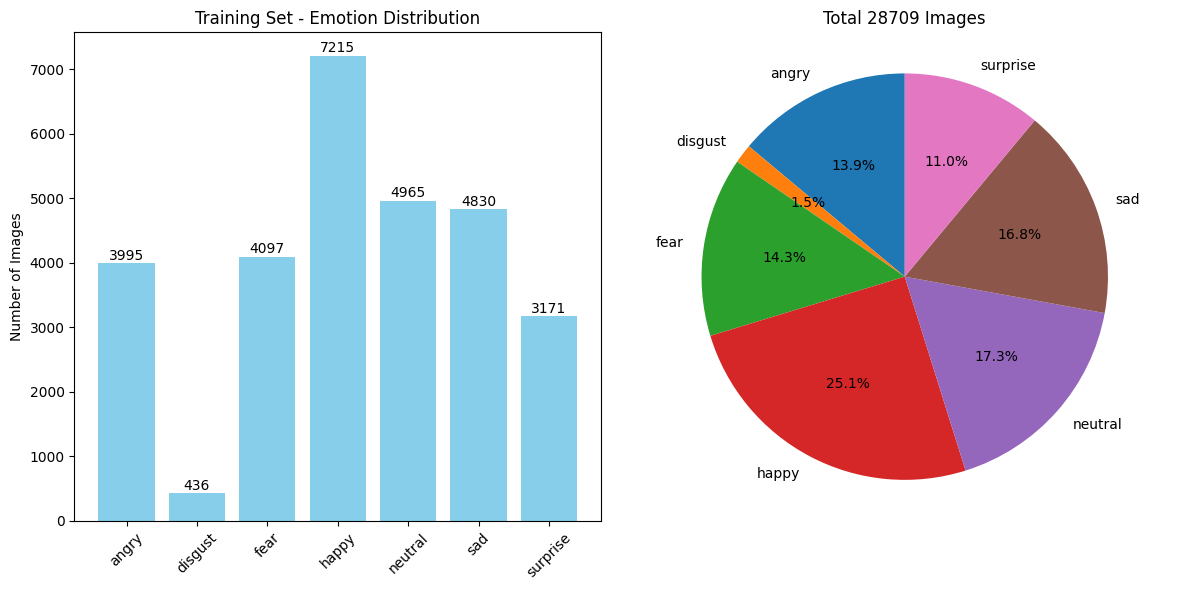


Validation Set:
  angry: 799 images
  disgust: 87 images
  fear: 819 images
  happy: 1443 images
  neutral: 993 images
  sad: 966 images
  surprise: 634 images
  Total: 5741 images


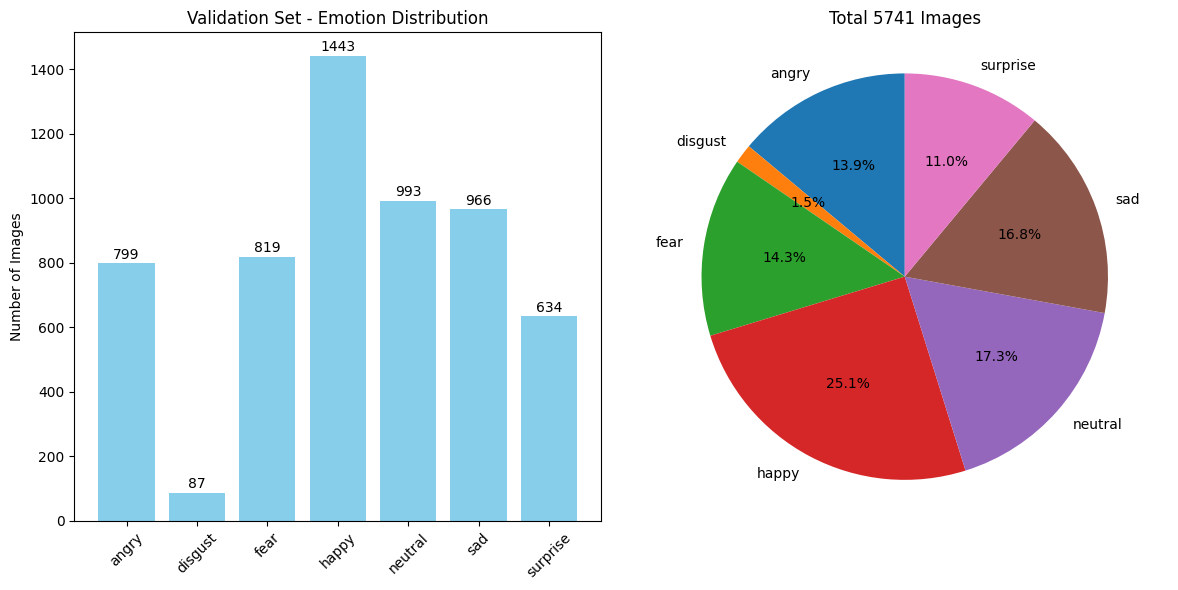


Test Set:
  angry: 958 images
  disgust: 111 images
  fear: 1024 images
  happy: 1774 images
  neutral: 1233 images
  sad: 1247 images
  surprise: 831 images
  Total: 7178 images


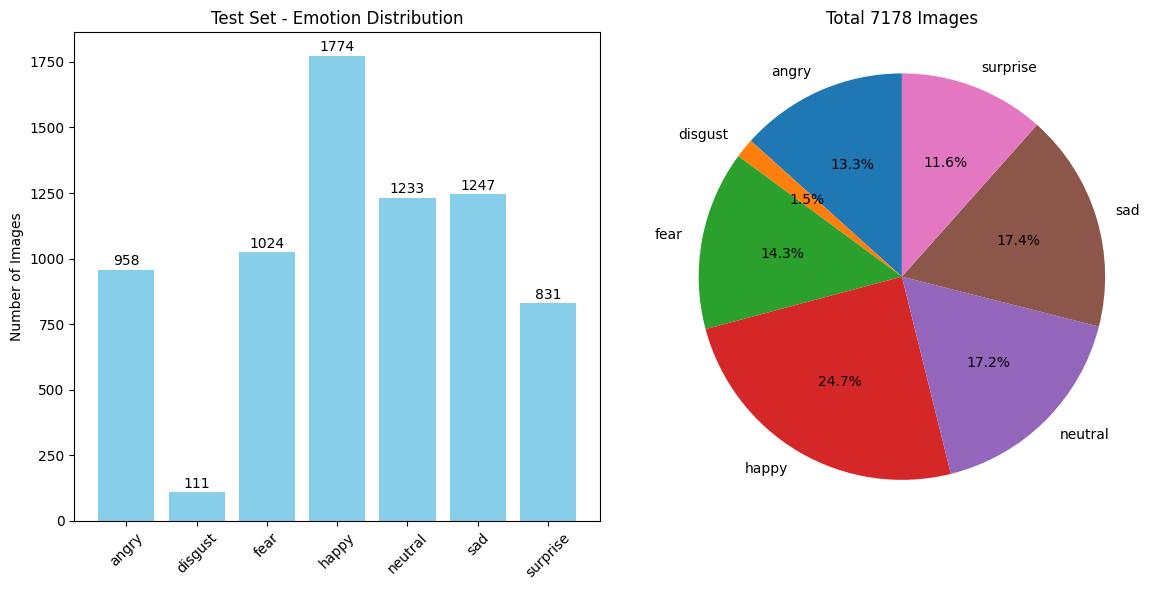

In [12]:
# Analyze datasets
def analyze_dataset(data_dir, title="Dataset Analysis"):
    """Analyzes and visualizes the dataset"""
    import matplotlib.pyplot as plt
    import numpy as np

    emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
    counts = []

    print(f"\n{title}:")
    total_images = 0

    for emotion in emotions:
        emotion_dir = os.path.join(data_dir, emotion)
        if os.path.exists(emotion_dir):
            files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            count = len(files)
            counts.append(count)
            total_images += count
            print(f"  {emotion}: {count} images")
        else:
            counts.append(0)
            print(f"  {emotion}: Folder not found!")

    print(f"  Total: {total_images} images")

    # Plot graphs
    plt.figure(figsize=(12, 6))

    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar(emotions, counts, color='skyblue')
    plt.title(f"{title} - Emotion Distribution")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)

    # Write values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{height}', ha='center', va='bottom')

    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=emotions, autopct='%1.1f%%',
           startangle=90, colors=plt.cm.tab10.colors)
    plt.axis('equal')
    plt.title(f"Total {total_images} Images")

    plt.tight_layout()
    plt.show()

    return counts

# Analyze all datasets
train_counts = analyze_dataset('/content/train', "Training Set")
val_counts = analyze_dataset('/content/validation', "Validation Set")
test_counts = analyze_dataset('/content/test', "Test Set")

Processing training images:
Source directory not found: /content/custom_data/Emotions.v1i.folder/train
Total: 0 images added to training set

Processing validation images:
Source directory not found: /content/custom_data/Emotions.v1i.folder/validation
Total: 0 images added to validation set

Processing test images:
Source directory not found: /content/custom_data/Emotions.v1i.folder/test
Total: 0 images added to test set

Total images added: 0

Updated dataset statistics after integration:

Training Set (with Roboflow Data):
  angry: 3995 images
  disgust: 436 images
  fear: 4097 images
  happy: 7215 images
  neutral: 4965 images
  sad: 4830 images
  surprise: 3171 images
  Total: 28709 images


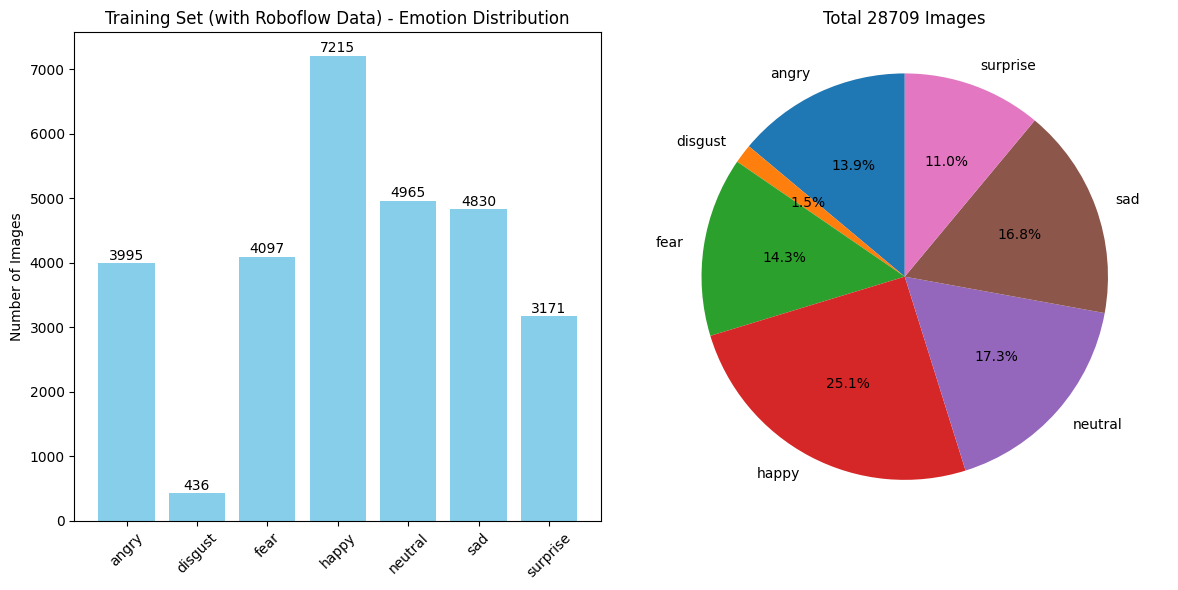


Validation Set (with Roboflow Data):
  angry: 799 images
  disgust: 87 images
  fear: 819 images
  happy: 1443 images
  neutral: 993 images
  sad: 966 images
  surprise: 634 images
  Total: 5741 images


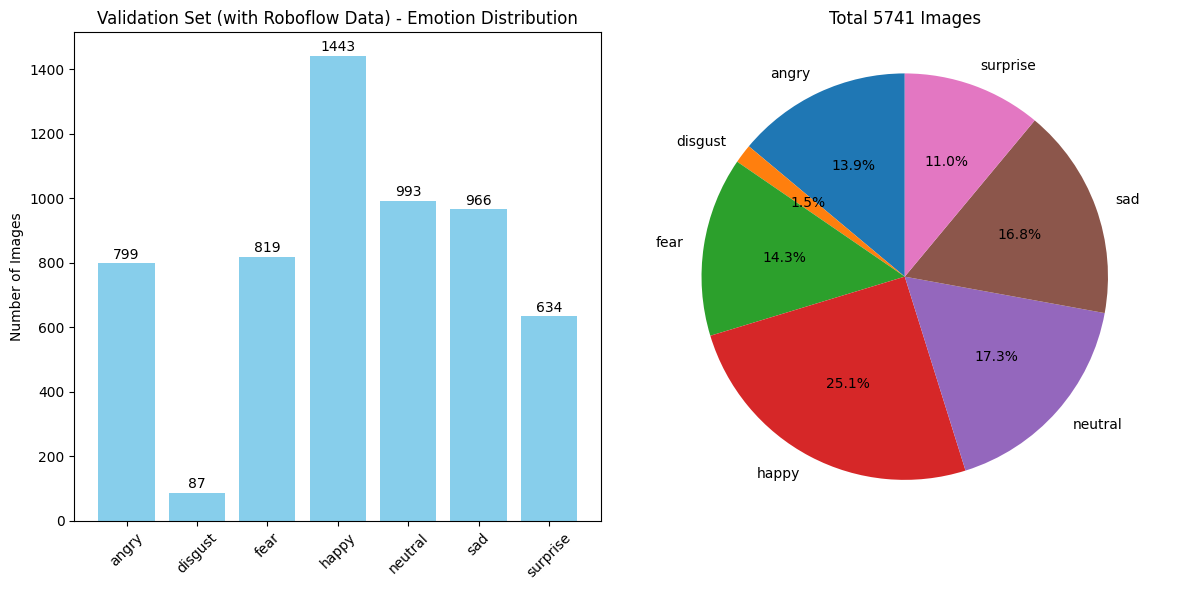


Test Set (with Roboflow Data):
  angry: 958 images
  disgust: 111 images
  fear: 1024 images
  happy: 1774 images
  neutral: 1233 images
  sad: 1247 images
  surprise: 831 images
  Total: 7178 images


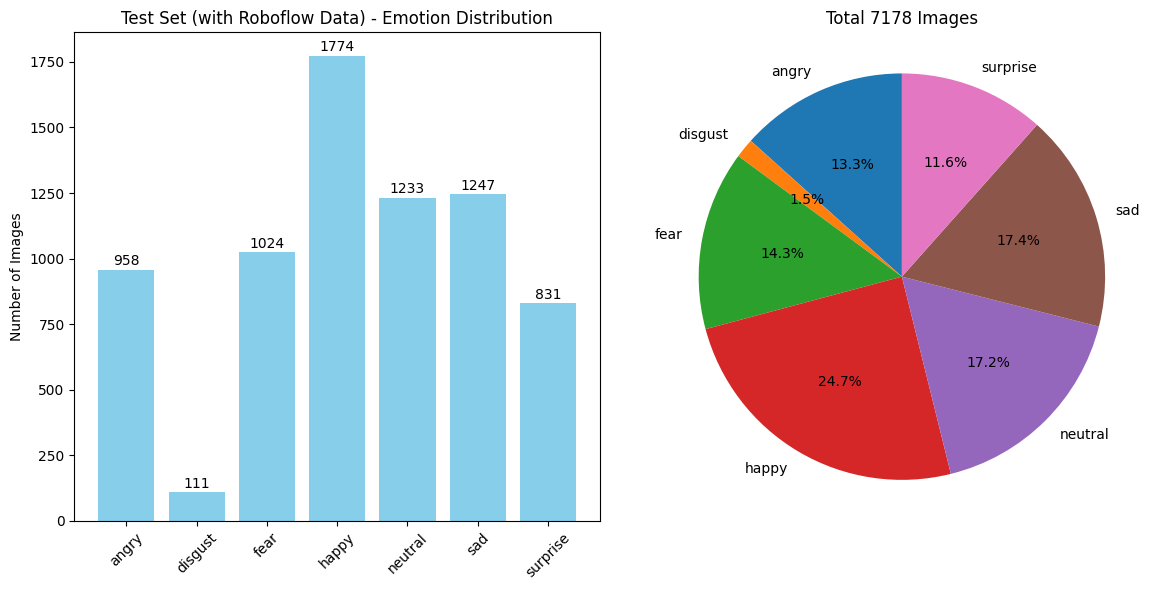

In [13]:
# Function to integrate Roboflow data with the correct folder structure
import os
import shutil

def integrate_roboflow_data():
    """Integrates Roboflow data with the existing dataset"""
    # Define paths
    roboflow_base = '/content/custom_data/Emotions.v1i.folder'
    roboflow_train = os.path.join(roboflow_base, 'train')
    roboflow_validation = os.path.join(roboflow_base, 'validation')
    roboflow_test = os.path.join(roboflow_base, 'test')

    # Destination paths
    dest_train = '/content/train'
    dest_validation = '/content/validation'
    dest_test = '/content/test'

    # Emotions
    emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

    # Function to copy images from source to destination
    def copy_emotion_images(src_dir, dst_dir, prefix="roboflow_"):
        if not os.path.exists(src_dir):
            print(f"Source directory not found: {src_dir}")
            return 0

        # Check if source is a directory
        if not os.path.isdir(src_dir):
            print(f"Source is not a directory: {src_dir}")
            return 0

        # List contents
        contents = os.listdir(src_dir)

        # Check if emotions are subdirectories or if images are directly here
        if any(emotion in contents for emotion in emotions):
            # Emotions are subdirectories
            total_copied = 0

            for emotion in emotions:
                emotion_src = os.path.join(src_dir, emotion)
                emotion_dst = os.path.join(dst_dir, emotion)

                # Skip if emotion directory doesn't exist
                if not os.path.exists(emotion_src):
                    continue

                # Make sure destination exists
                os.makedirs(emotion_dst, exist_ok=True)

                # List all image files
                image_files = [f for f in os.listdir(emotion_src)
                              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

                # Copy each image
                for img_file in image_files:
                    src_path = os.path.join(emotion_src, img_file)
                    dst_path = os.path.join(emotion_dst, f"{prefix}{emotion}_{img_file}")
                    shutil.copy(src_path, dst_path)
                    total_copied += 1

                if image_files:
                    print(f"  {emotion}: {len(image_files)} images copied")

            return total_copied
        else:
            # Images might be directly in this directory
            # Try to infer emotion from directory name
            dir_name = os.path.basename(src_dir).lower()

            for emotion in emotions:
                if emotion in dir_name:
                    # Found matching emotion
                    emotion_dst = os.path.join(dst_dir, emotion)
                    os.makedirs(emotion_dst, exist_ok=True)

                    # List all image files
                    image_files = [f for f in contents
                                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

                    # Copy each image
                    for img_file in image_files:
                        src_path = os.path.join(src_dir, img_file)
                        dst_path = os.path.join(emotion_dst, f"{prefix}{emotion}_{img_file}")
                        shutil.copy(src_path, dst_path)

                    if image_files:
                        print(f"  {emotion}: {len(image_files)} images copied")
                    return len(image_files)

            # If no emotion found in directory name, prompt user
            print(f"Could not determine emotion for directory: {src_dir}")
            print(f"Contents: {contents}")
            return 0

    # Copy train images
    print("Processing training images:")
    train_copied = copy_emotion_images(roboflow_train, dest_train)
    print(f"Total: {train_copied} images added to training set")

    # Copy validation images
    print("\nProcessing validation images:")
    val_copied = copy_emotion_images(roboflow_validation, dest_validation)
    print(f"Total: {val_copied} images added to validation set")

    # Copy test images
    print("\nProcessing test images:")
    test_copied = copy_emotion_images(roboflow_test, dest_test)
    print(f"Total: {test_copied} images added to test set")

    # Total
    total_copied = train_copied + val_copied + test_copied
    print(f"\nTotal images added: {total_copied}")

# Run the integration function
integrate_roboflow_data()

# Update dataset statistics
print("\nUpdated dataset statistics after integration:")
train_counts = analyze_dataset('/content/train', "Training Set (with Roboflow Data)")
val_counts = analyze_dataset('/content/validation', "Validation Set (with Roboflow Data)")
test_counts = analyze_dataset('/content/test', "Test Set (with Roboflow Data)")

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
import time
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
from google.colab.patches import cv2_imshow

# Define emotion labels
EMOTIONS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Emotion Recognition Class
class EmotionRecognition:
    def __init__(self, model_path=None):
        """
        Initialize the emotion recognition class

        Args:
            model_path: Path to a pre-trained model (optional)
        """
        self.model = None
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.training_history = None

        if model_path and os.path.exists(model_path):
            self.load_model(model_path)
        else:
            self.build_model()

    def build_model(self):
        """Build the CNN model"""
        model = Sequential()

        # 1st Convolutional Block
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # 2nd Convolutional Block
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # 3rd Convolutional Block
        model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Fully Connected Layers
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Output Layer (7 emotion classes)
        model.add(Dense(7, activation='softmax'))

        # Compile model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        self.model = model
        return model

    def load_model(self, model_path):
        """Load a pre-trained model"""
        self.model = load_model(model_path)
        print(f"Model loaded: {model_path}")

    def save_model(self, model_path):
        """Save the trained model"""
        if self.model:
            self.model.save(model_path)
            print(f"Model saved: {model_path}")
        else:
            print("No model to save!")

    def train(self, train_dir='/content/train', validation_dir='/content/validation', epochs=30, batch_size=64,
              checkpoint_path='best_model.h5', early_stopping_patience=10,
              monitor_metric='val_accuracy'):
        """
        Train the model

        Args:
            train_dir: Training data directory
            validation_dir: Validation data directory
            epochs: Number of training epochs
            batch_size: Mini-batch size
            checkpoint_path: Path to save the best model
            early_stopping_patience: Patience for early stopping
            monitor_metric: Metric to monitor ('val_accuracy' or 'val_loss')

        Returns:
            Training history
        """
        if not self.model:
            self.build_model()

        # Summarize the model
        self.model.summary()

        # Data augmentation and normalization
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        # Only normalization for validation
        validation_datagen = ImageDataGenerator(rescale=1./255)

        # Data flows
        train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(48, 48),
            color_mode='grayscale',
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )

        validation_generator = validation_datagen.flow_from_directory(
            validation_dir,
            target_size=(48, 48),
            color_mode='grayscale',
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False
        )

        callbacks = [
            EarlyStopping(
                monitor=monitor_metric,
                patience=early_stopping_patience,
                verbose=1,
                restore_best_weights=True
            ),
            ModelCheckpoint(
                filepath=checkpoint_path,
                monitor=monitor_metric,
                save_best_only=True,
                mode='max' if monitor_metric == 'val_accuracy' else 'min',
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor=monitor_metric,
                factor=0.2,
                patience=5,
                min_lr=0.00001,
                verbose=1
            )
        ]

        # Variables to store training metrics
        self.training_history = {
            'epoch': [],
            'train_loss': [],
            'train_acc': [],
            'train_f1': [],
            'val_loss': [],
            'val_acc': [],
            'val_f1': []
        }

        # Custom metrics callback
        class MetricsCallback(tf.keras.callbacks.Callback):
            def __init__(self, validation_data, training_history, class_names):
                super(MetricsCallback, self).__init__()
                self.validation_data = validation_data
                self.training_history = training_history
                self.class_names = class_names

            def on_epoch_end(self, epoch, logs=None):
                # Calculate validation F1 score
                y_true = []
                y_pred = []

                # Get true labels and predictions from validation set
                for i in range(len(self.validation_data)):
                    x_batch, y_batch = self.validation_data[i]
                    pred_batch = self.model.predict(x_batch)

                    # Accumulate predictions
                    y_true.extend(np.argmax(y_batch, axis=1))
                    y_pred.extend(np.argmax(pred_batch, axis=1))

                    # Limit predictions per epoch
                    if len(y_true) >= len(self.validation_data.classes):
                        break

                # Calculate F1 score
                f1 = f1_score(y_true, y_pred, average='weighted')

                # Calculate train F1 score from one batch
                train_batch = next(train_generator)
                train_pred = self.model.predict(train_batch[0])
                train_true = np.argmax(train_batch[1], axis=1)
                train_pred_classes = np.argmax(train_pred, axis=1)
                train_f1 = f1_score(train_true, train_pred_classes, average='weighted')

                # Add to history
                self.training_history['epoch'].append(epoch + 1)
                self.training_history['train_loss'].append(logs['loss'])
                self.training_history['train_acc'].append(logs['accuracy'])
                self.training_history['train_f1'].append(train_f1)
                self.training_history['val_loss'].append(logs['val_loss'])
                self.training_history['val_acc'].append(logs['val_accuracy'])
                self.training_history['val_f1'].append(f1)

                # Print progress
                print(f"\nEpoch {epoch+1}: F1 Score - Train: {train_f1:.4f}, Val: {f1:.4f}")

                # Show confusion matrix every 5 epochs
                if (epoch + 1) % 5 == 0 or epoch == 0:
                    cm = confusion_matrix(y_true, y_pred)
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                              xticklabels=self.class_names, yticklabels=self.class_names)
                    plt.title(f'Epoch {epoch+1} - Confusion Matrix')
                    plt.ylabel('True Label')
                    plt.xlabel('Predicted Label')
                    plt.show()

        # Add custom metrics callback
        metrics_callback = MetricsCallback(
            validation_generator,
            self.training_history,
            EMOTIONS
        )
        callbacks.append(metrics_callback)

        # Start training
        start_time = time.time()

        history = self.model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks
        )

        # Calculate training time
        training_time = time.time() - start_time
        hours, remainder = divmod(training_time, 3600)
        minutes, seconds = divmod(remainder, 60)
        print(f"\nTraining completed! Total time: {int(hours)} hours, {int(minutes)} minutes, {seconds:.2f} seconds")

        # Load the best model
        if os.path.exists(checkpoint_path):
            self.load_model(checkpoint_path)

        return history

    def evaluate(self, test_dir, batch_size=64):
        """
        Evaluate the model on test data

        Args:
            test_dir: Test data directory
            batch_size: Mini-batch size

        Returns:
            Evaluation results
        """
        if not self.model:
            raise ValueError("Model not loaded! Train or load a model first.")

        # Test data flow
        test_datagen = ImageDataGenerator(rescale=1./255)
        test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(48, 48),
            color_mode='grayscale',
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False
        )

        # Evaluate model
        print("Testing model...")
        scores = self.model.evaluate(test_generator)
        print(f"Test Loss: {scores[0]:.4f}")
        print(f"Test Accuracy: {scores[1]:.4f}")

        # Get predictions
        y_true = test_generator.classes
        y_pred_probs = self.model.predict(test_generator)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Sınıf etiketlerini veri üretecinden alalım
        class_indices = test_generator.class_indices
        # Sınıf indekslerini tersine çevirelim {0: 'angry', 1: 'disgust', ...}
        idx_to_class = {v: k for k, v in class_indices.items()}

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Classification report - veri üretecinden alınan gerçek sınıf adlarını kullanalım
        class_names = [idx_to_class[i] for i in range(len(idx_to_class))]
        report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

        # F1 scores - güvenli bir şekilde oluşturalım
        f1_scores = {}
        display_names = EMOTIONS  # Görüntüleme için orijinal duygu adları

        for i, class_name in enumerate(class_names):
            if i < len(display_names):
                emotion_display = display_names[i]
            else:
                emotion_display = class_name.capitalize()  # Eğer indeks aşılırsa sınıf adını kullan

            if class_name in report:
                f1_scores[emotion_display] = report[class_name]['f1-score']
            else:
                print(f"Uyarı: '{class_name}' raporda bulunamadı!")
                f1_scores[emotion_display] = 0.0

        # Visualize results with actual class names from the generator
        self.visualize_evaluation_results(cm, f1_scores, report, class_names)

        return {
            'loss': scores[0],
            'accuracy': scores[1],
            'f1_scores': f1_scores,
            'avg_f1': report['weighted avg']['f1-score'],
            'confusion_matrix': cm,
            'report': report,
            'class_names': class_names
        }

    def visualize_evaluation_results(self, cm, f1_scores, report, class_names):
        """Visualize evaluation results with class names from data generator"""
        plt.figure(figsize=(20, 10))

        # 1. Confusion matrix - kullan class_names
        plt.subplot(1, 2, 1)
        display_names = [name.capitalize() for name in class_names]  # İlk harfi büyük yap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=display_names, yticklabels=display_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

        # 2. F1 scores
        plt.subplot(1, 2, 2)
        bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
        plt.title('F1 Scores by Emotion')
        plt.ylabel('F1 Score')
        plt.ylim(0, 1.0)
        plt.xticks(rotation=45)

        # Write values on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        # Print detailed report - class_names kullanarak güncellendi
        print("\nClassification Report:")
        for i, class_name in enumerate(class_names):
            if class_name in report:
                precision = report[class_name]['precision']
                recall = report[class_name]['recall']
                f1 = report[class_name]['f1-score']
                support = report[class_name]['support']

                # Görüntüleme için sınıf adını düzgün formatta gösterelim
                display_name = class_name.capitalize()
                print(f"{display_name}: Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}, Support={support}")

        print(f"\nAverage F1 Score: {report['weighted avg']['f1-score']:.4f}")
        print(f"Average Precision: {report['weighted avg']['precision']:.4f}")
        print(f"Average Recall: {report['weighted avg']['recall']:.4f}")

    def visualize_training_history(self):
        """Visualize training history"""
        if not self.training_history:
            print("No training history found!")
            return

        plt.figure(figsize=(20, 15))

        # 1. Training and validation loss
        plt.subplot(2, 2, 1)
        plt.plot(self.training_history['epoch'], self.training_history['train_loss'], 'b-', label='Training Loss')
        plt.plot(self.training_history['epoch'], self.training_history['val_loss'], 'r-', label='Validation Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        # 2. Training and validation accuracy
        plt.subplot(2, 2, 2)
        plt.plot(self.training_history['epoch'], self.training_history['train_acc'], 'b-', label='Training Accuracy')
        plt.plot(self.training_history['epoch'], self.training_history['val_acc'], 'r-', label='Validation Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        # 3. Training and validation F1 score
        plt.subplot(2, 2, 3)
        plt.plot(self.training_history['epoch'], self.training_history['train_f1'], 'b-', label='Training F1')
        plt.plot(self.training_history['epoch'], self.training_history['val_f1'], 'r-', label='Validation F1')
        plt.title('F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.grid(True)

        # 4. All metrics together
        plt.subplot(2, 2, 4)
        plt.plot(self.training_history['epoch'], self.training_history['train_loss'], 'b--', label='Train Loss')
        plt.plot(self.training_history['epoch'], self.training_history['val_loss'], 'b-', label='Val Loss')
        plt.plot(self.training_history['epoch'], self.training_history['train_acc'], 'g--', label='Train Acc')
        plt.plot(self.training_history['epoch'], self.training_history['val_acc'], 'g-', label='Val Acc')
        plt.plot(self.training_history['epoch'], self.training_history['train_f1'], 'r--', label='Train F1')
        plt.plot(self.training_history['epoch'], self.training_history['val_f1'], 'r-', label='Val F1')
        plt.title('All Metrics')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def predict_emotion(self, image):
        """
        Predict emotion in an image with improved face detection
        """
        if self.model is None:
            raise ValueError("Model not loaded! Train or load a model first.")

        # Convert image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Görüntüyü eşitleyin (contrast artışı)
        gray = cv2.equalizeHist(gray)

        # Görüntüyü yeniden boyutlandırın (çok büyükse)
        height, width = gray.shape
        max_dimension = 1200  # Maksimum boyut
        scale = 1.0
        if max(height, width) > max_dimension:
            scale = max_dimension / max(height, width)
            gray = cv2.resize(gray, (int(width * scale), int(height * scale)))
            image = cv2.resize(image, (int(width * scale), int(height * scale)))

        # Daha esnek yüz tespiti parametreleri
        faces = self.face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,  # 1.3 yerine 1.1 (daha az agresif ölçekleme)
            minNeighbors=3,   # 5 yerine 3 (daha az komşu gereksinimi)
            minSize=(30, 30), # Minimum yüz boyutu
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        # Hala yüz bulunamadıysa alternatif bir kütüphane deneyelim
        if len(faces) == 0:
            print("OpenCV Haar Cascade yüz tespit edemedi, diğer yöntemleri deneyebilirsiniz.")
            # Burada alternatif olarak DNN tabanlı bir yüz dedektörü kullanılabilir
            # Ancak bu Colab'de ek kurulum gerektirebilir

        # Result image
        result_img = image.copy()
        predictions = []

        if len(faces) == 0:
            print("No faces detected in the image! Try a clearer image with a frontal face.")
            # Tüm görüntüyü bir yüz olarak kabul edelim (son çare)
            print("Trying to process the entire image as a face...")

            # Tüm görüntüyü 48x48 boyutuna getir
            face_roi = cv2.resize(gray, (48, 48))
            face_roi = face_roi / 255.0
            face_roi = face_roi.reshape(1, 48, 48, 1)

            # Duygu tahmini yap
            prediction = self.model.predict(face_roi)[0]
            emotion_idx = np.argmax(prediction)
            emotion = EMOTIONS[emotion_idx]
            confidence = prediction[emotion_idx]

            # Sonuçları ekle
            predictions.append((emotion, confidence))
            cv2.putText(result_img, f"Whole image: {emotion} ({confidence:.2f})", (10, 30),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            for (x, y, w, h) in faces:
                # Normal yüz tespiti işlemi...
                face_roi = gray[y:y+h, x:x+w]
                face_roi = cv2.resize(face_roi, (48, 48))
                face_roi = face_roi / 255.0
                face_roi = face_roi.reshape(1, 48, 48, 1)
                prediction = self.model.predict(face_roi)[0]
                emotion_idx = np.argmax(prediction)
                emotion = EMOTIONS[emotion_idx]
                confidence = prediction[emotion_idx]
                predictions.append((emotion, confidence))
                cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(result_img, f"{emotion} ({confidence:.2f})", (x, y-10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        return result_img, predictions

    def predict_from_file(self, image_path):
        """Predict emotion from an image file"""
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not load image: {image_path}")

        return self.predict_emotion(image)

    def predict_uploaded_image(self):
        """Let user upload an image and predict emotions"""
        from google.colab import files

        print("Please upload an image file...")
        uploaded = files.upload()

        if not uploaded:
            print("No file uploaded!")
            return

        for filename in uploaded.keys():
            # Convert to numpy array
            file_bytes = np.frombuffer(uploaded[filename], np.uint8)
            image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

            if image is not None:
                # Predict emotion
                result_img, predictions = self.predict_emotion(image)

                # Show results
                print(f"\nFile: {filename}")
                if predictions:
                    for i, (emotion, confidence) in enumerate(predictions):
                        print(f"Face {i+1}: {emotion} (confidence: {confidence:.2f})")
                else:
                    print("No faces detected in the image!")

                # Display processed image
                cv2_imshow(result_img)
            else:
                print(f"Error: Could not open {filename} as an image!")

# Main training workflow - FIXED: moved outside the class
def main_workflow(train_dir='/content/train', validation_dir='/content/validation', test_dir='/content/test', epochs=25):
    """
    Main workflow to train and evaluate the model

    Args:
        train_dir: Training data directory
        validation_dir: Validation data directory
        test_dir: Test data directory
        epochs: Number of training epochs

    Returns:
        Trained model
    """
    print("Step 1: Starting emotion recognition model training...")

    # Create model
    model = EmotionRecognition()

    # Train model
    print("Training model...")
    history = model.train(
        train_dir=train_dir,
        validation_dir=validation_dir,
        epochs=epochs,
        batch_size=64,
        checkpoint_path='/content/best_emotion_model.h5'
    )

    # Visualize training history
    print("\nStep 2: Visualizing training history...")
    model.visualize_training_history()

    # Evaluate model on test set
    print("\nStep 3: Evaluating model on test set...")
    evaluation = model.evaluate(test_dir)

    # Save final model
    model.save_model('/content/final_emotion_model.h5')
    print("\nModel saved to /content/final_emotion_model.h5")

    # Return the trained model
    return model

Step 1: Starting emotion recognition model training...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 638,855 (2.44 MB)

 Trainable params: 636,935 (2.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Found 28709 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1874 - loss: 2.4807
Epoch 1: val_accuracy improved from -inf to 0.25316, saving model to /content/best_emotion_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━

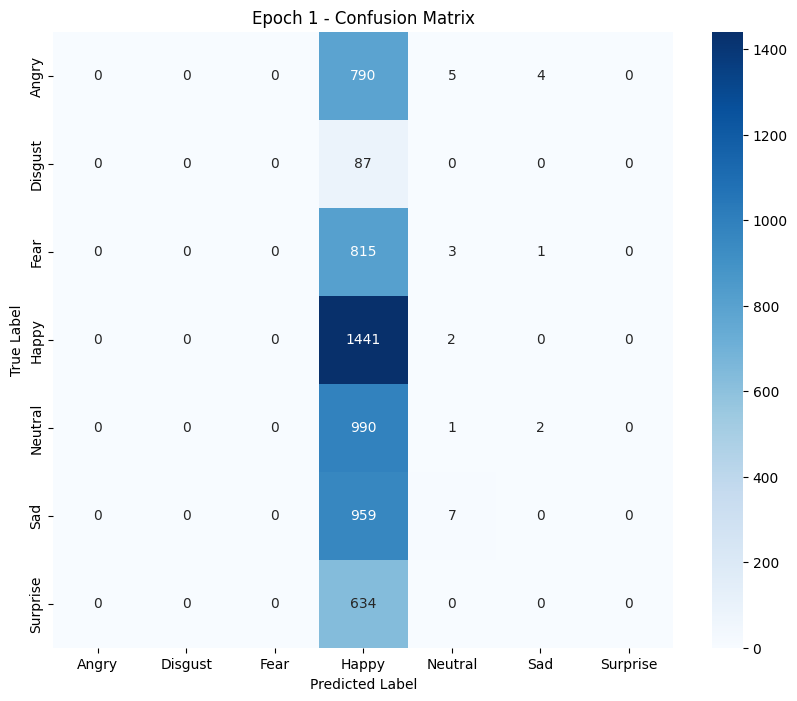

448/448 ━━━━━━━━━━━━━━━━━━━━ 57s 98ms/step - accuracy: 0.1875 - loss: 2.4801 - val_accuracy: 0.2532 - val_loss: 1.8396 - learning_rate: 0.0010
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2500 - loss: 1.8406

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.25316
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 4: val_accuracy did not improve from 0.33058
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

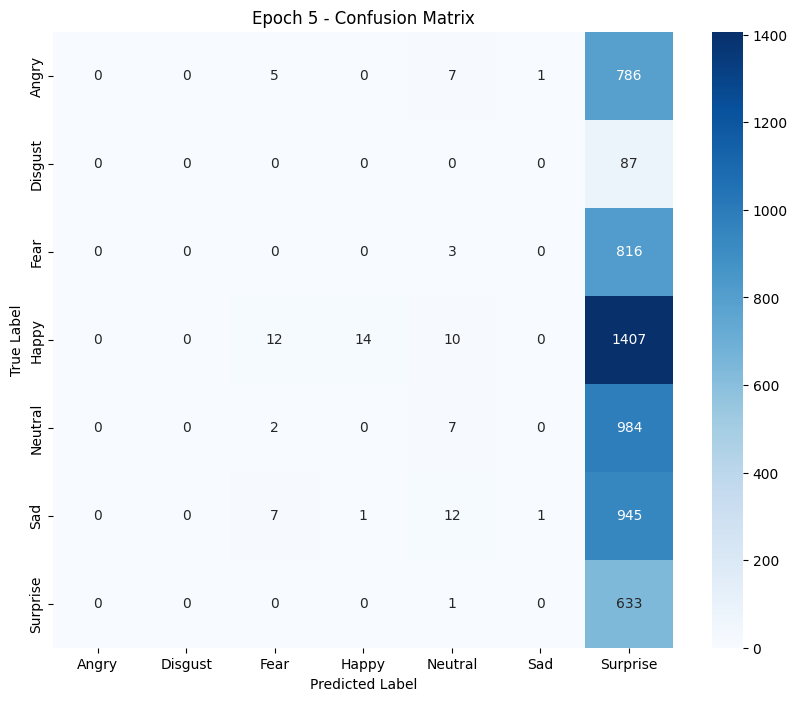

448/448 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.3478 - loss: 1.6439 - val_accuracy: 0.1073 - val_loss: 2.9466 - learning_rate: 0.0010
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.4688 - loss: 1.5196

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 6: val_accuracy did not improve from 0.33058
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 8: val_accuracy did not improve from 0.46594
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 10: val_accuracy improved from 0.47683 to 0.47770, saving model to /content/best_emotion_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━

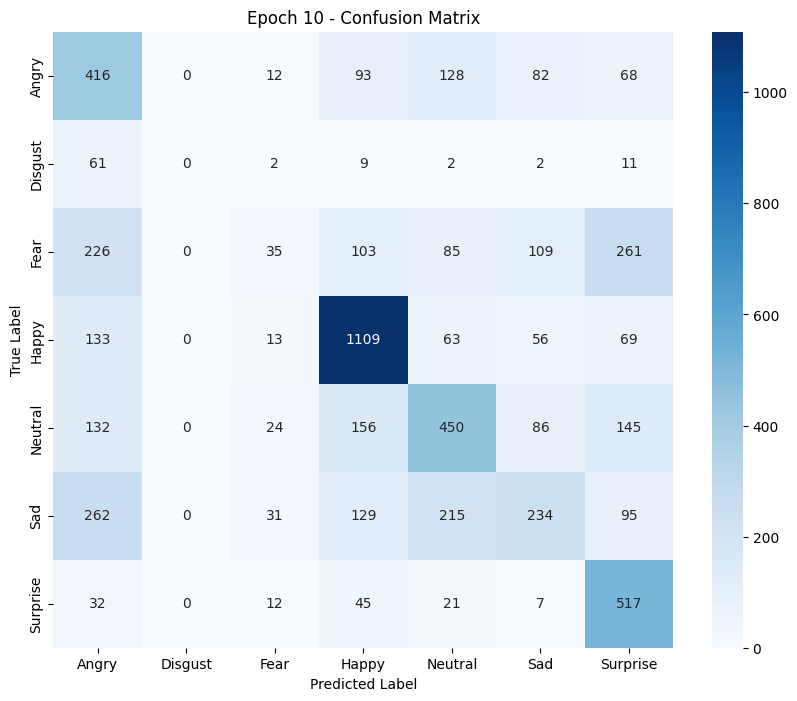

448/448 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4375 - loss: 1.4387 - val_accuracy: 0.4777 - val_loss: 1.3356 - learning_rate: 0.0010
Epoch 11/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4840 - loss: 1.3655
Epoch 11: val_accuracy did not improve from 0.47770
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 12: val_accuracy did not improve from 0.47770
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/st

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 14: val_accuracy improved from 0.50421 to 0.50667, saving model to /content/best_emotion_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━

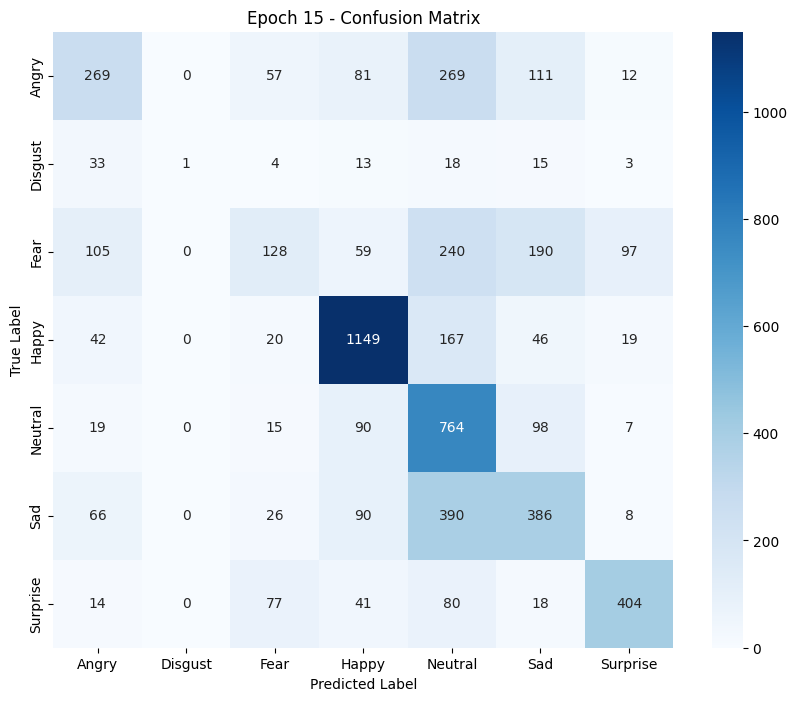

448/448 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.5108 - loss: 1.2970 - val_accuracy: 0.5392 - val_loss: 1.2085 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 15.

Training completed! Total time: 0 hours, 6 minutes, 9.50 seconds


Model loaded: /content/best_emotion_model.h5

Step 2: Visualizing training history...


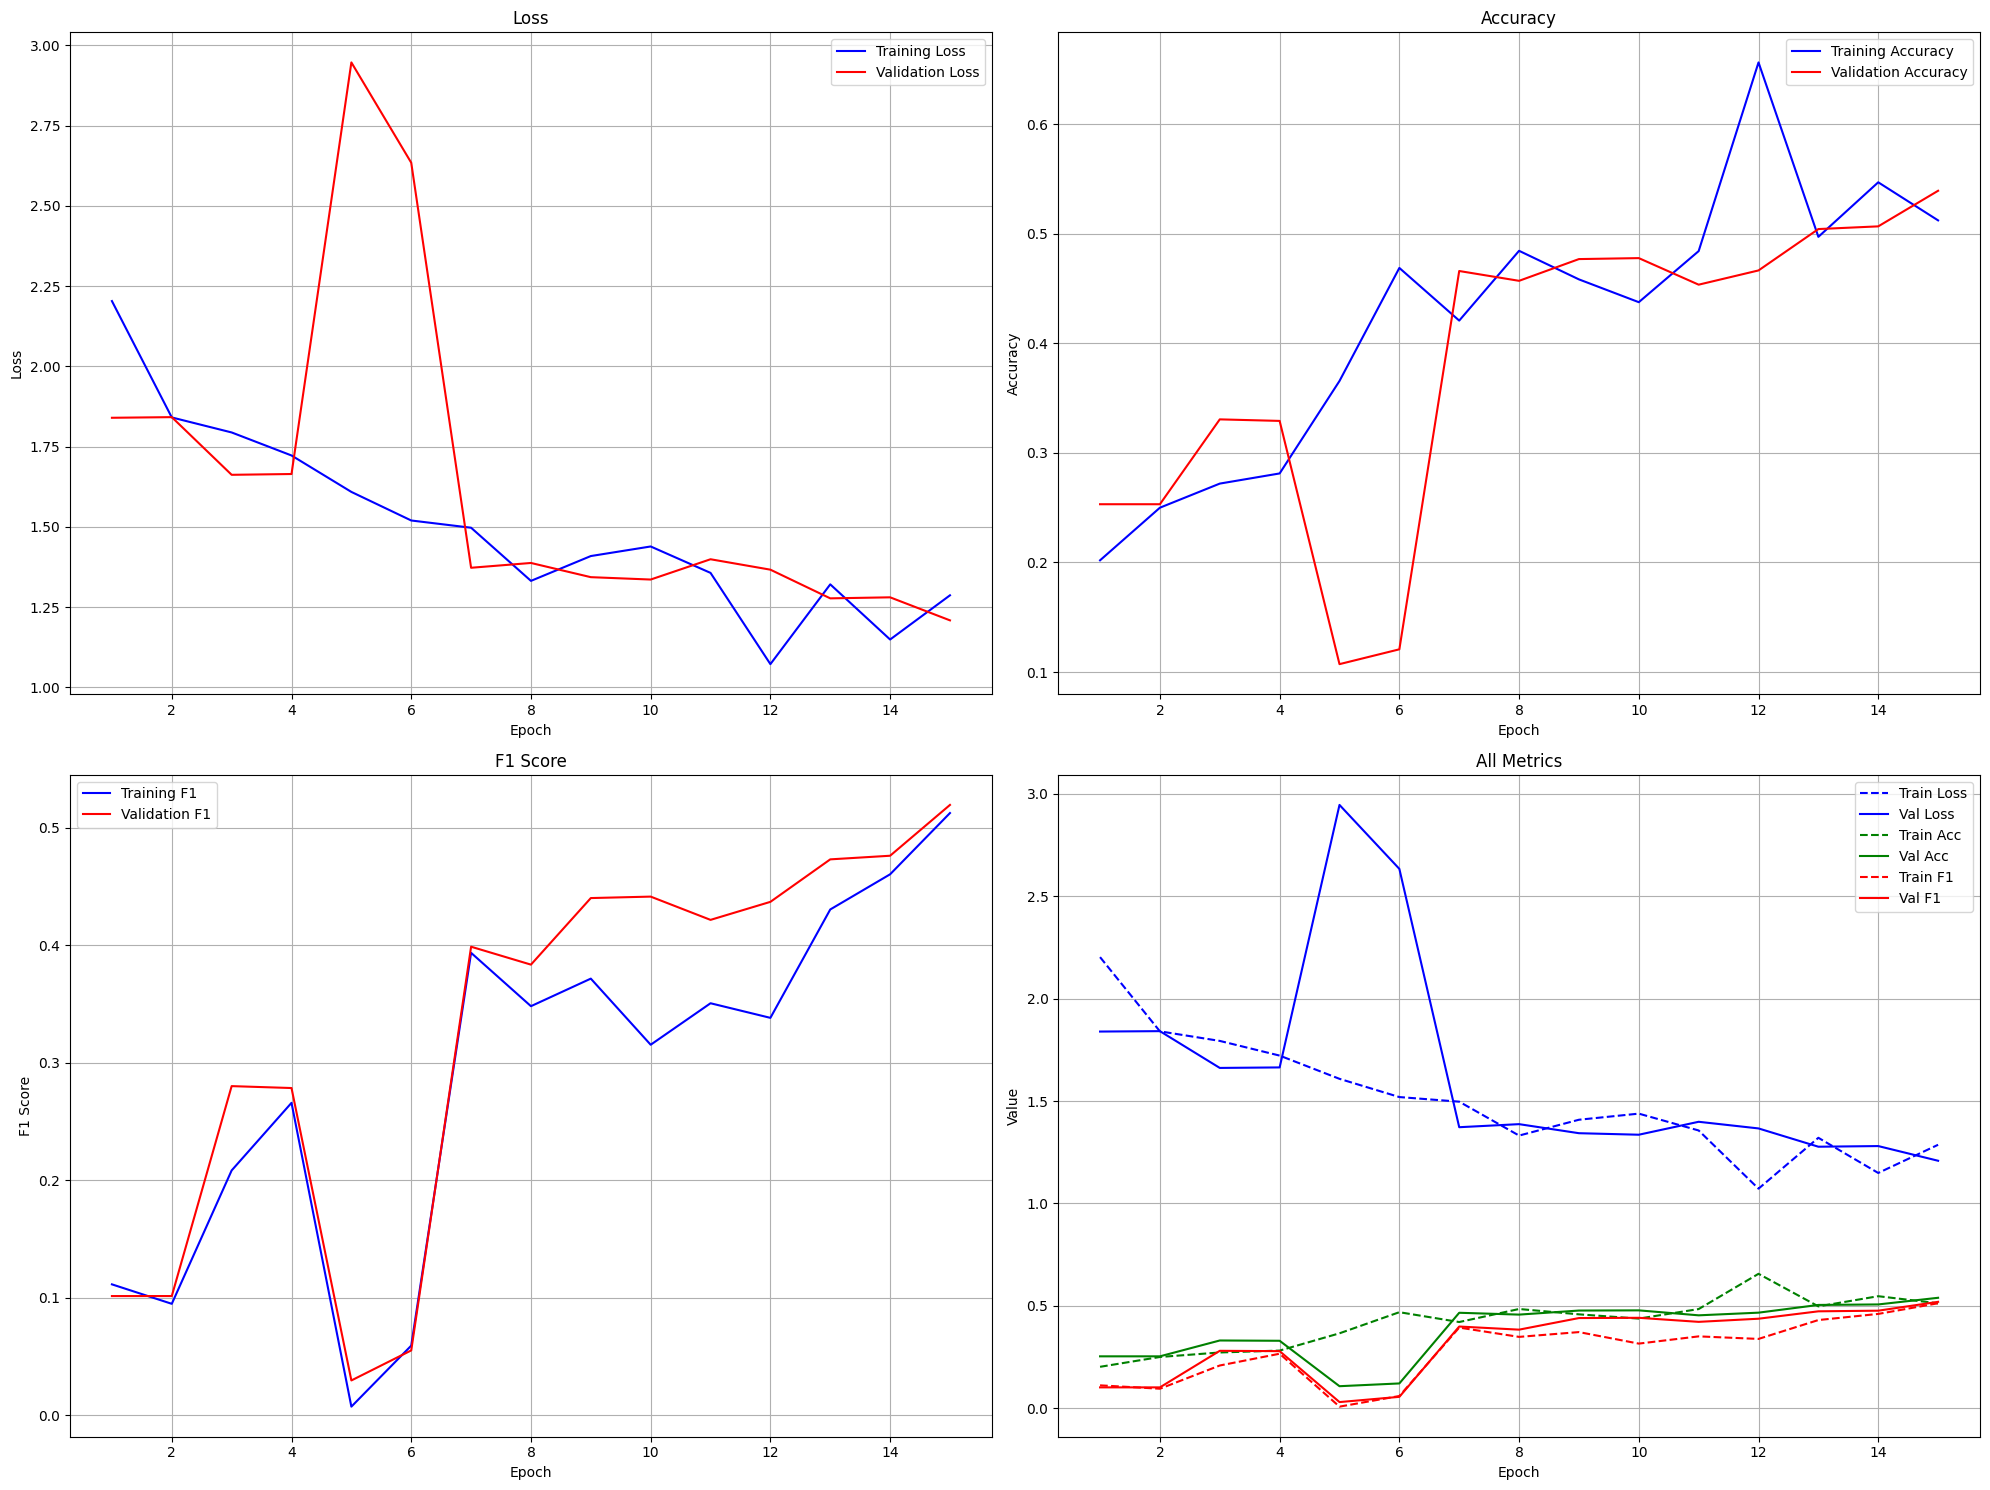


Step 3: Evaluating model on test set...
Found 7178 images belonging to 7 classes.
Testing model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4246 - loss: 1.4359
Test Loss: 1.2363
Test Accuracy: 0.5248
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


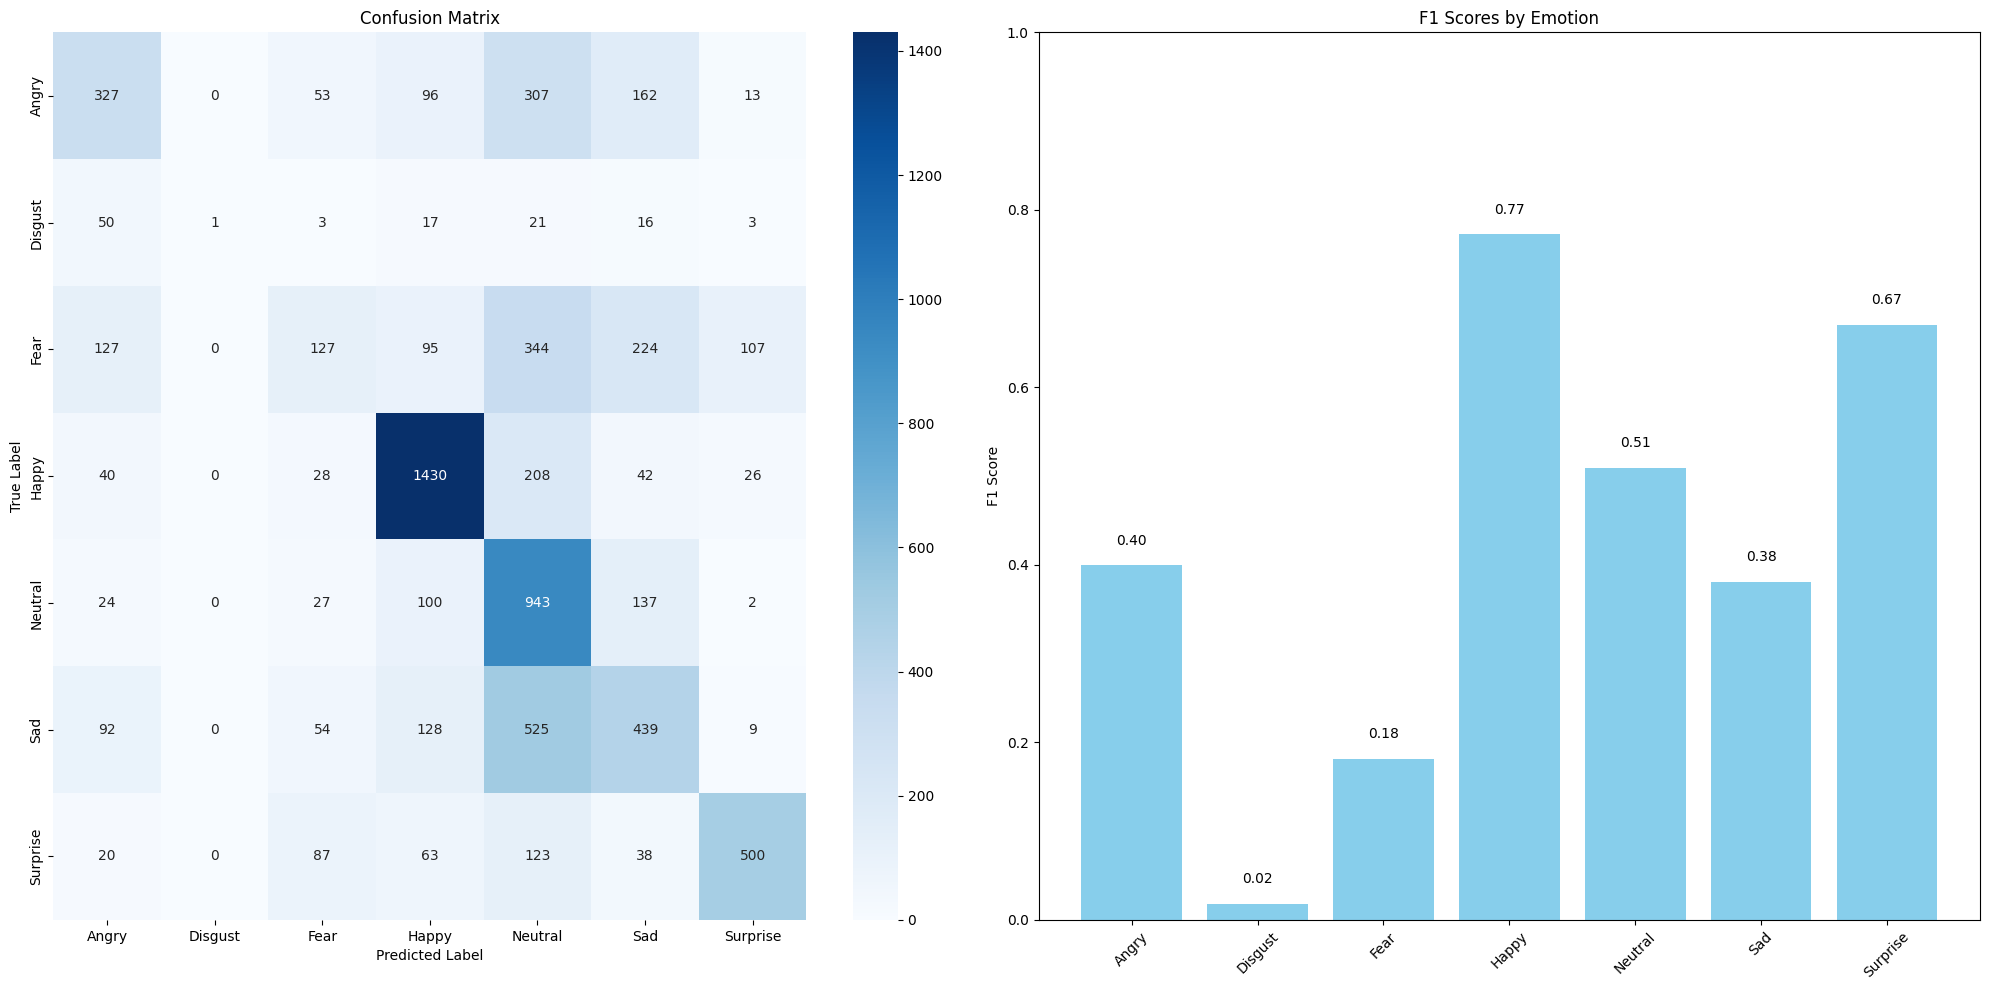


Classification Report:
Angry: Precision=0.48, Recall=0.34, F1=0.40, Support=958.0
Disgust: Precision=1.00, Recall=0.01, F1=0.02, Support=111.0
Fear: Precision=0.34, Recall=0.12, F1=0.18, Support=1024.0
Happy: Precision=0.74, Recall=0.81, F1=0.77, Support=1774.0
Neutral: Precision=0.38, Recall=0.76, F1=0.51, Support=1233.0
Sad: Precision=0.41, Recall=0.35, F1=0.38, Support=1247.0
Surprise: Precision=0.76, Recall=0.60, F1=0.67, Support=831.0

Average F1 Score: 0.5016
Average Precision: 0.5360
Average Recall: 0.5248
Model saved: /content/final_emotion_model.h5

Model saved to /content/final_emotion_model.h5


In [15]:
model = main_workflow(epochs=15)  # Epoch sayısını istediğiniz gibi ayarlayabilirsiniz

Please upload an image file...


Saving Training_99971684.jpg to Training_99971684.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step

File: Training_99971684.jpg
Face 1: Neutral (confidence: 0.58)


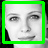

In [16]:
# Eğitilmiş modelle fotoğrafta duygu tespiti yapın
model.predict_uploaded_image()

Model loaded: /content/final_emotion_model.h5
Please upload an image file...


Saving Training_99911960.jpg to Training_99911960.jpg
OpenCV Haar Cascade yüz tespit edemedi, diğer yöntemleri deneyebilirsiniz.
No faces detected in the image! Try a clearer image with a frontal face.
Trying to process the entire image as a face...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step

File: Training_99911960.jpg
Face 1: Happy (confidence: 0.36)


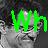

In [17]:
# Kaydedilmiş modeli yükleyin
loaded_model = EmotionRecognition(model_path='/content/final_emotion_model.h5')

# Yüklenen modelle duygu tespiti yapın
loaded_model.predict_uploaded_image()